In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import tensorflow_hub as hub

In [2]:
root_dir = os.path.abspath(os.path.join(os.pardir,'datasets','EmotionDetection', 'images'))

In [3]:
os.listdir(os.path.abspath(os.path.join(root_dir, 'train','angry')))

['0.jpg',
 '1.jpg',
 '10.jpg',
 '10002.jpg',
 '10016.jpg',
 '10037.jpg',
 '10038.jpg',
 '10057.jpg',
 '10063.jpg',
 '10069.jpg',
 '10100.jpg',
 '10105.jpg',
 '10115.jpg',
 '10122.jpg',
 '10142.jpg',
 '1015.jpg',
 '10154.jpg',
 '10155.jpg',
 '10158.jpg',
 '1016.jpg',
 '10167.jpg',
 '10178.jpg',
 '1018.jpg',
 '10181.jpg',
 '10192.jpg',
 '10196.jpg',
 '10202.jpg',
 '10207.jpg',
 '10214.jpg',
 '10223.jpg',
 '10226.jpg',
 '10240.jpg',
 '10242.jpg',
 '10250.jpg',
 '10251.jpg',
 '10253.jpg',
 '10265.jpg',
 '10287.jpg',
 '10302.jpg',
 '10310.jpg',
 '10325.jpg',
 '10348.jpg',
 '10359.jpg',
 '10363.jpg',
 '10364.jpg',
 '10373.jpg',
 '10377.jpg',
 '10378.jpg',
 '10385.jpg',
 '10388.jpg',
 '1039.jpg',
 '10394.jpg',
 '10397.jpg',
 '10401.jpg',
 '10420.jpg',
 '10429.jpg',
 '10430.jpg',
 '10431.jpg',
 '10439.jpg',
 '10440.jpg',
 '10441.jpg',
 '10462.jpg',
 '10472.jpg',
 '10475.jpg',
 '10490.jpg',
 '10497.jpg',
 '1051.jpg',
 '10510.jpg',
 '10511.jpg',
 '10541.jpg',
 '10544.jpg',
 '10548.jpg',
 '10563.

In [4]:
example_image_path = os.path.join(root_dir, 'train', 'sad', os.listdir(os.path.join(root_dir, 'train','sad'))[1])

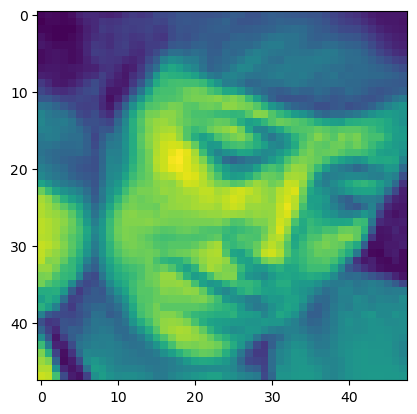

In [5]:
example_image = plt.imread(example_image_path)
plt.imshow(example_image);

In [6]:
root_dir

'C:\\D-Drive\\ComputerScience\\DSProjs\\DataScience-Projects\\datasets\\EmotionDetection\\images'

In [151]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255., horizontal_flip = True, rotation_range = 45, shear_range = 0.3, zoom_range = 0.3, width_shift_range=0.2, height_shift_range=0.2)

In [152]:
train_dataset = train_datagen.flow_from_directory(os.path.join(root_dir, 'train'), target_size = (48, 48), batch_size = 128)

Found 28821 images belonging to 7 classes.


In [153]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255., horizontal_flip = True, rotation_range = 45, shear_range = 0.3, zoom_range = 0.3, width_shift_range=0.2, height_shift_range=0.2)

In [154]:
validation_dataset = validation_datagen.flow_from_directory(os.path.join(root_dir, 'validation'), target_size = (48, 48), batch_size = 128)

Found 7066 images belonging to 7 classes.


In [174]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D( 64, (3 , 3), activation='relu', input_shape = (48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3 , 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3 , 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')
    
])

In [175]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 256)      

In [176]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data = validation_dataset, epochs = 30  )

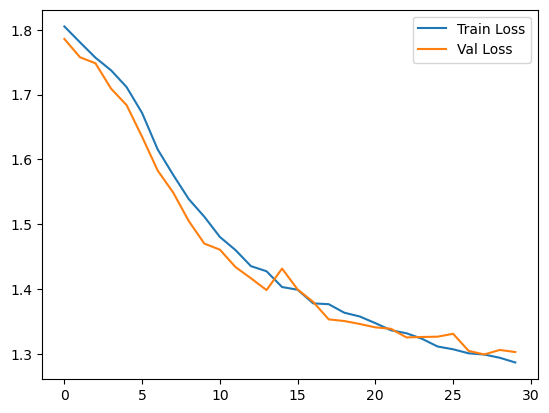

In [21]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend();

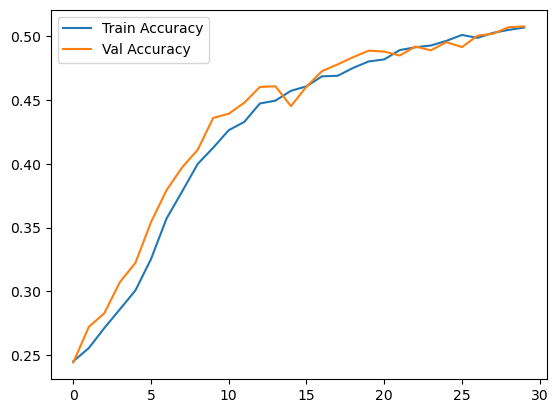

In [22]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend();

In [ ]:
## Accuracy only 50 percent. Not a very ideal number. Trying out transfer learning with DenseNet169

In [140]:
from tensorflow.keras.applications import DenseNet169

In [141]:
 base_model = tf.keras.applications.DenseNet169(input_shape=(48,48, 3),
                                               include_top=False,
                                               weights="imagenet")

51877672/51877672 [==============================] - 4s 0us/step


In [159]:
base_model.trainable = False

In [169]:
mv2 = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.GlobalAveragePooling2D(),
     tf.keras.layers.Dense(256, activation = 'relu'),
     tf.keras.layers.Dense(128, activation = 'relu'),
     
#     tf.keras.layers.MaxPooling2D(2, 2),
  
    tf.keras.layers.Dense(7, activation = 'softmax')
])

In [170]:
mv2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [171]:
mv2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1, 1, 1664)        12642880  
                                                                 
 global_average_pooling2d_8   (None, 1664)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_34 (Dense)            (None, 256)               426240    
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 7)                 903       
                                                                 
Total params: 13,102,919
Trainable params: 460,039
Non-trainable params: 12,642,880
___________________________________

In [172]:
# Showing a better accuracy

In [173]:
history_v2 = mv2.fit(train_dataset, validation_data = validation_dataset, epochs = 30  )

Epoch 1/30
226/226 [==============================] - 251s 1s/step - loss: 1.7095 - accuracy: 0.3103 - val_loss: 1.6620 - val_accuracy: 0.3351
Epoch 2/30
226/226 [==============================] - 276s 1s/step - loss: 1.6583 - accuracy: 0.3361 - val_loss: 1.6467 - val_accuracy: 0.3501
Epoch 3/30
226/226 [==============================] - 462s 2s/step - loss: 1.6492 - accuracy: 0.3419 - val_loss: 1.6401 - val_accuracy: 0.3514
Epoch 4/30
226/226 [==============================] - 216s 955ms/step - loss: 1.6344 - accuracy: 0.3475 - val_loss: 1.6330 - val_accuracy: 0.3534
Epoch 5/30
226/226 [==============================] - 208s 922ms/step - loss: 1.6315 - accuracy: 0.3530 - val_loss: 1.6396 - val_accuracy: 0.3521
Epoch 6/30
226/226 [==============================] - 209s 923ms/step - loss: 1.6222 - accuracy: 0.3570 - val_loss: 1.6203 - val_accuracy: 0.3613
Epoch 7/30
226/226 [==============================] - 213s 943ms/step - loss: 1.6177 - accuracy: 0.3531 - val_loss: 1.6218 - val_accu

KeyboardInterrupt: 

In [185]:
test_preds = mv2.predict(validation_dataset)

56/56 [==============================] - 57s 978ms/step


In [186]:
from sklearn.metrics import confusion_matrix

In [187]:
confusion_matrix(validation_dataset.labels,list(map(np.argmax, test_preds)))

array([[110,   1, 103, 333, 155, 148, 110],
       [ 16,   0,  14,  34,  22,  18,   7],
       [ 97,   0,  77, 367, 170, 158, 149],
       [194,   0, 166, 630, 338, 263, 234],
       [146,   0, 116, 431, 201, 174, 148],
       [133,   0, 107, 402, 190, 161, 146],
       [ 85,   0,  69, 272, 135, 141,  95]], dtype=int64)